### Censo Adultos

#### 1.- Librerías utilizadas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline

#### 2.- Carga y dimensión de datos

In [5]:
df_train = pd.read_csv('train_adultos.csv',sep=',')

In [ ]:
#Obtener la dimensionalidad, es decir cuantas filas y columnas tiene el dataset
df_train.shape

(32561, 15)

In [6]:
#El listado de nombres de las columnas
df_train.columns

Index(['age', 'work-class', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

Edad: este atributo nos informa sobre la edad de cualquier individuo. Es un atributo numérico con valores continuos, y dado que es una variable de intervalo donde la medición cero indica que no hay edad / cero.

WorkClass: este atributo nos informa sobre la clase de trabajo individual de cualquier individuo. Es un atributo categórico, con diferentes valores como privado, gobierno federal, gobierno local, gobierno estatal, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Educación: este atributo nos informa sobre el nivel educativo más alto de cualquier individuo. Es un atributo categórico, con diferentes valores como Bachillerato, Preescolar, Maestría, Doctorado, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Education-num: este atributo es una representación numérica del atributo de educación, que indica el nivel educativo más alto de cualquier individuo. Cuanto mayor sea el valor, mayor será el nivel educativo. Es un atributo ordinal ya que cada valor es distinto y tiene cierto orden, cuanto mayor sea el valor, mayor será el nivel educativo.

Estado civil: este atributo nos informa sobre el estado civil de un individuo. Es un atributo categórico, con diferentes valores como Casado-civil-cónyuge, Divorciado, Nunca casado, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Ocupación: este atributo nos informa sobre el campo de ocupación de un individuo. Es un atributo categórico, con diferentes valores como soporte técnico, reparación de artesanía, ventas, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Relación: este atributo nos informa sobre la relación del individuo en una familia. Es un atributo categórico, con diferentes valores como esposa, esposo, soltero, etc. Es un atributo nominal, ya que cada valor es distinto y tiene algún significado.

Raza: este atributo nos informa sobre la raza de un individuo. Es un atributo categórico, con diferentes valores como Blanco, Negro, Asiático-Pac-Islander, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Sexo: este atributo nos informa sobre el sexo / género de un individuo. Es un atributo categórico, con dos valores Masculino, Femenino. Es un atributo nominal ya que cada valor es distinto y tiene algún significado asociado.

Ganancia de capital: este atributo nos dice la ganancia / ingreso de fuentes de inversión distintas al salario. Es un atributo numérico con valores continuos, ya que es una variable de intervalo donde la medición cero significa que no hay ganancia de capital.

Pérdida de capital: este atributo nos dice la pérdida de fuentes de inversión distintas al salario. Es un atributo numérico con valores continuos, ya que es una variable de intervalo donde la medición cero significa que no hay pérdida de capital.

Horas por semana: este atributo nos dice la cantidad de horas que un individuo trabaja por semana. Es un atributo numérico con valores continuos, ya que es una variable de intervalo donde la medición cero significa que la persona no trabaja.

País nativo: este atributo nos informa sobre el país nativo / país de origen de un individuo. Es un atributo categórico con valores como Estados Unidos, India, Inglaterra, etc. Es un atributo nominal ya que cada valor es distinto y tiene algún significado.

Ingresos: este atributo nos informa sobre los ingresos de un individuo, ya sea menor que 50k o mayor que 50k. Es un valor categórico y un atributo nominal.

El enunciado del problema es predecir si el ingreso excede los 50 mil al año o no en función de los datos del censo

In [7]:
#Visualizar los primeros registros de mi dataset
df_train.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
#Observar el detalle de valores únicos de mi variable target
df_train['income'].unique()

array(['<=50K', '>50K'], dtype=object)

La varibables income es nuestra variable target por lo cual la cambiaremos por 0 y 1 para facilitar el análisis

In [9]:
#Modifico los valores de la variable dependiente y lo convierto a numérico
df_train['income'] = df_train['income'].replace(['<=50K'],'0')
df_train['income'] = df_train['income'].replace(['>50K'],'1')
df_train['income'] = df_train['income'].astype('int')

In [10]:
#Por si necesitas eliminar una variable que no debió estar considerada
df_train.drop(['fnlwgt'], axis=1, inplace=True)
df_train.head(3)

,age,work-class,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


#### 3.- Entendimiento de datos

##### 3.1.- Valores nulos

In [11]:
#Visualizar el tipo de dato y la cantidad de registros que no son nulos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work-class      30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income          32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


In [12]:
#Visualizar las variables con datos nulos
df_train.isna().sum()

,0
age,0
work-class,1836
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0
capital-gain,0


Existen valores nules en las variables: Work-class, Occupatión y Native Country pero que no representán más del 6% del total de datos, igualmente analizaremos los campos nulos por si existe alguna relación entre las variables.

<Axes: >

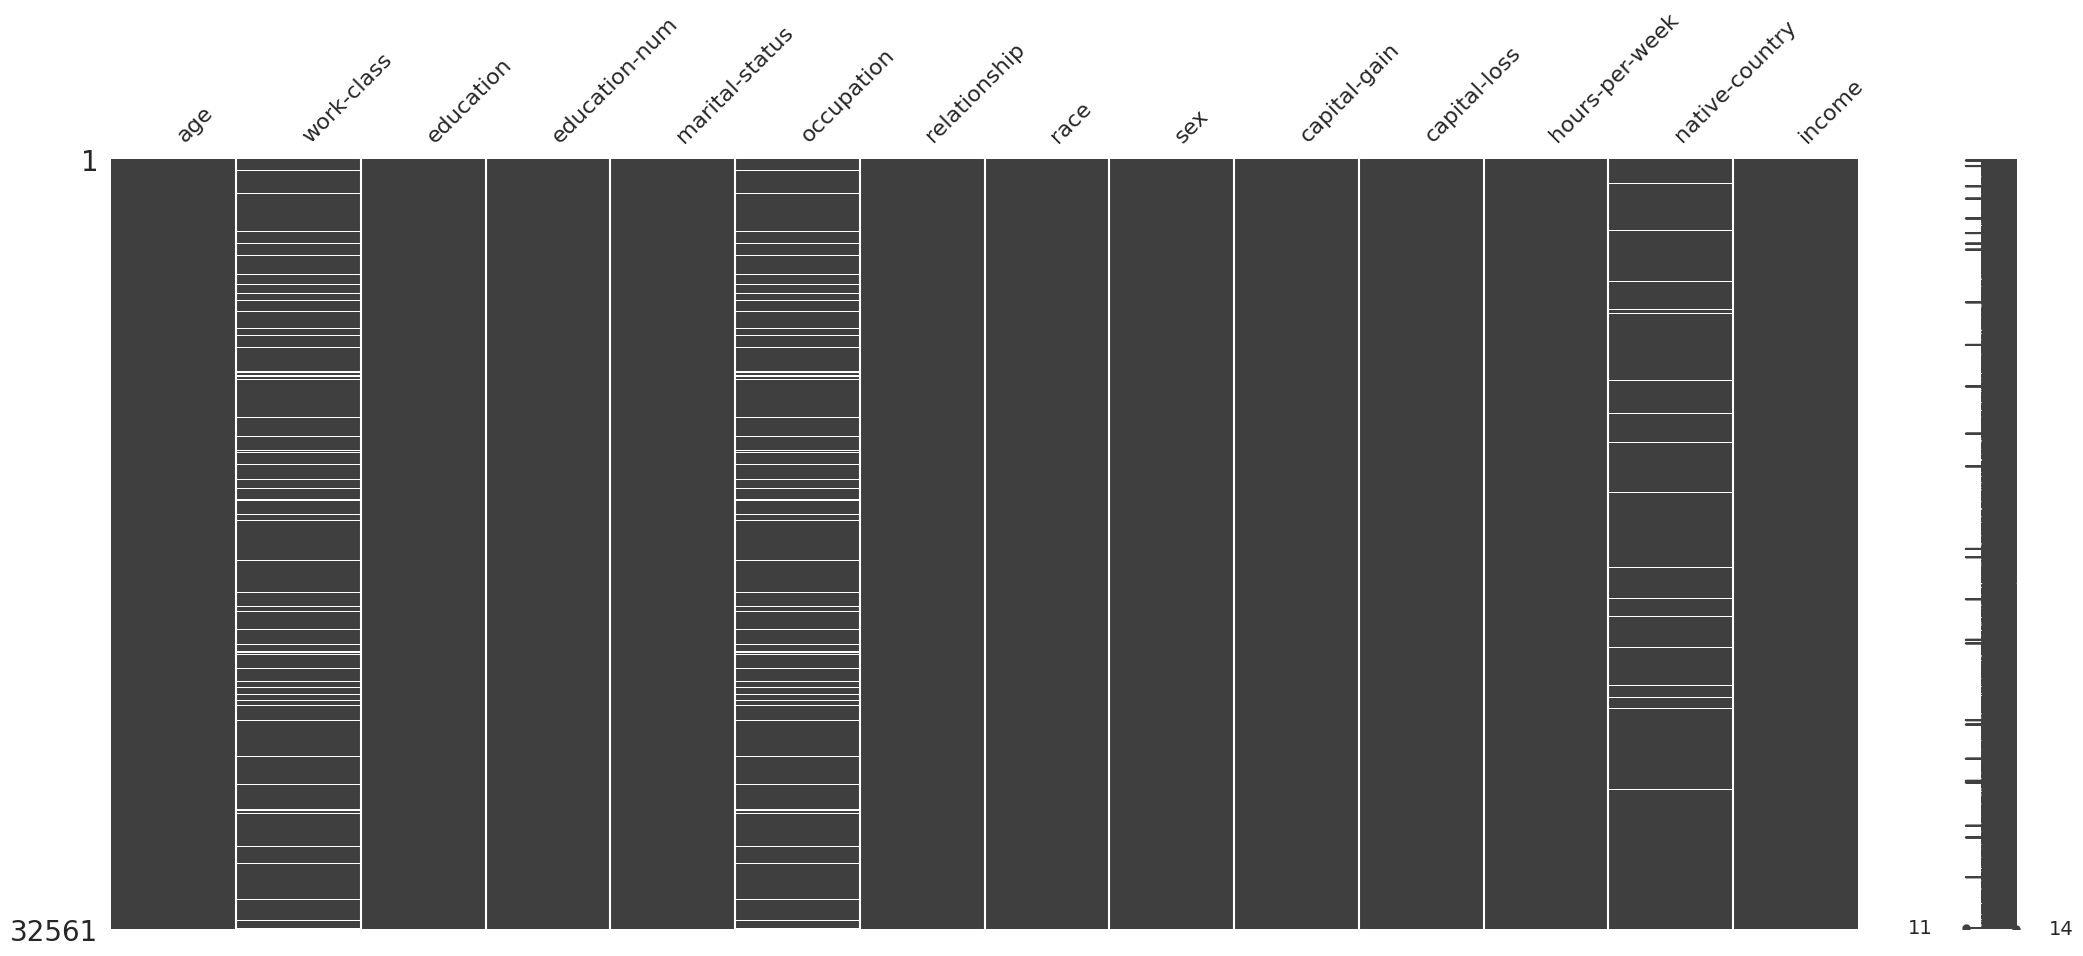

In [13]:
import missingno as msno
msno.matrix(df_train)

Podemos ver que en los casos donde figura un valor nulo en "Work Class", también se da para "Occupation", por lo que nos dice que la persona encuestada no tiene ocupación ni trabajo actual.

El campo de "Native Country" si parece un caso aislado.

##### 3.2.- Variable Target

,0
income,
0,24720
1,7841


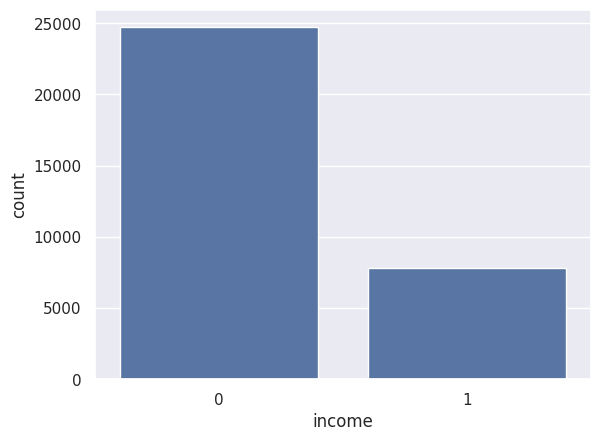

In [14]:
#sns.factorplot('income',data=df_train,kind="count")
sns.countplot(data = df_train, x = "income")

df_train.groupby('income').size()

Aproximadamente el 24% de personas encuestadas tiene un saldo por encima de los 50K mil dólares.

##### 3.3.- Variables cuantitativas

##### 3.3.1.- Medidas Estadísticas

In [15]:
#Visualizar las principales estadísticas de las variables numéricas
df_train.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


Analizamos las variables numéricas donde podemos observar que existen posibles valores atípicos en gran medida son "Capital-gain" y "Capital-loss" y en menor medida en "Age" y "Hours-per-week".

In [16]:
Variables = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

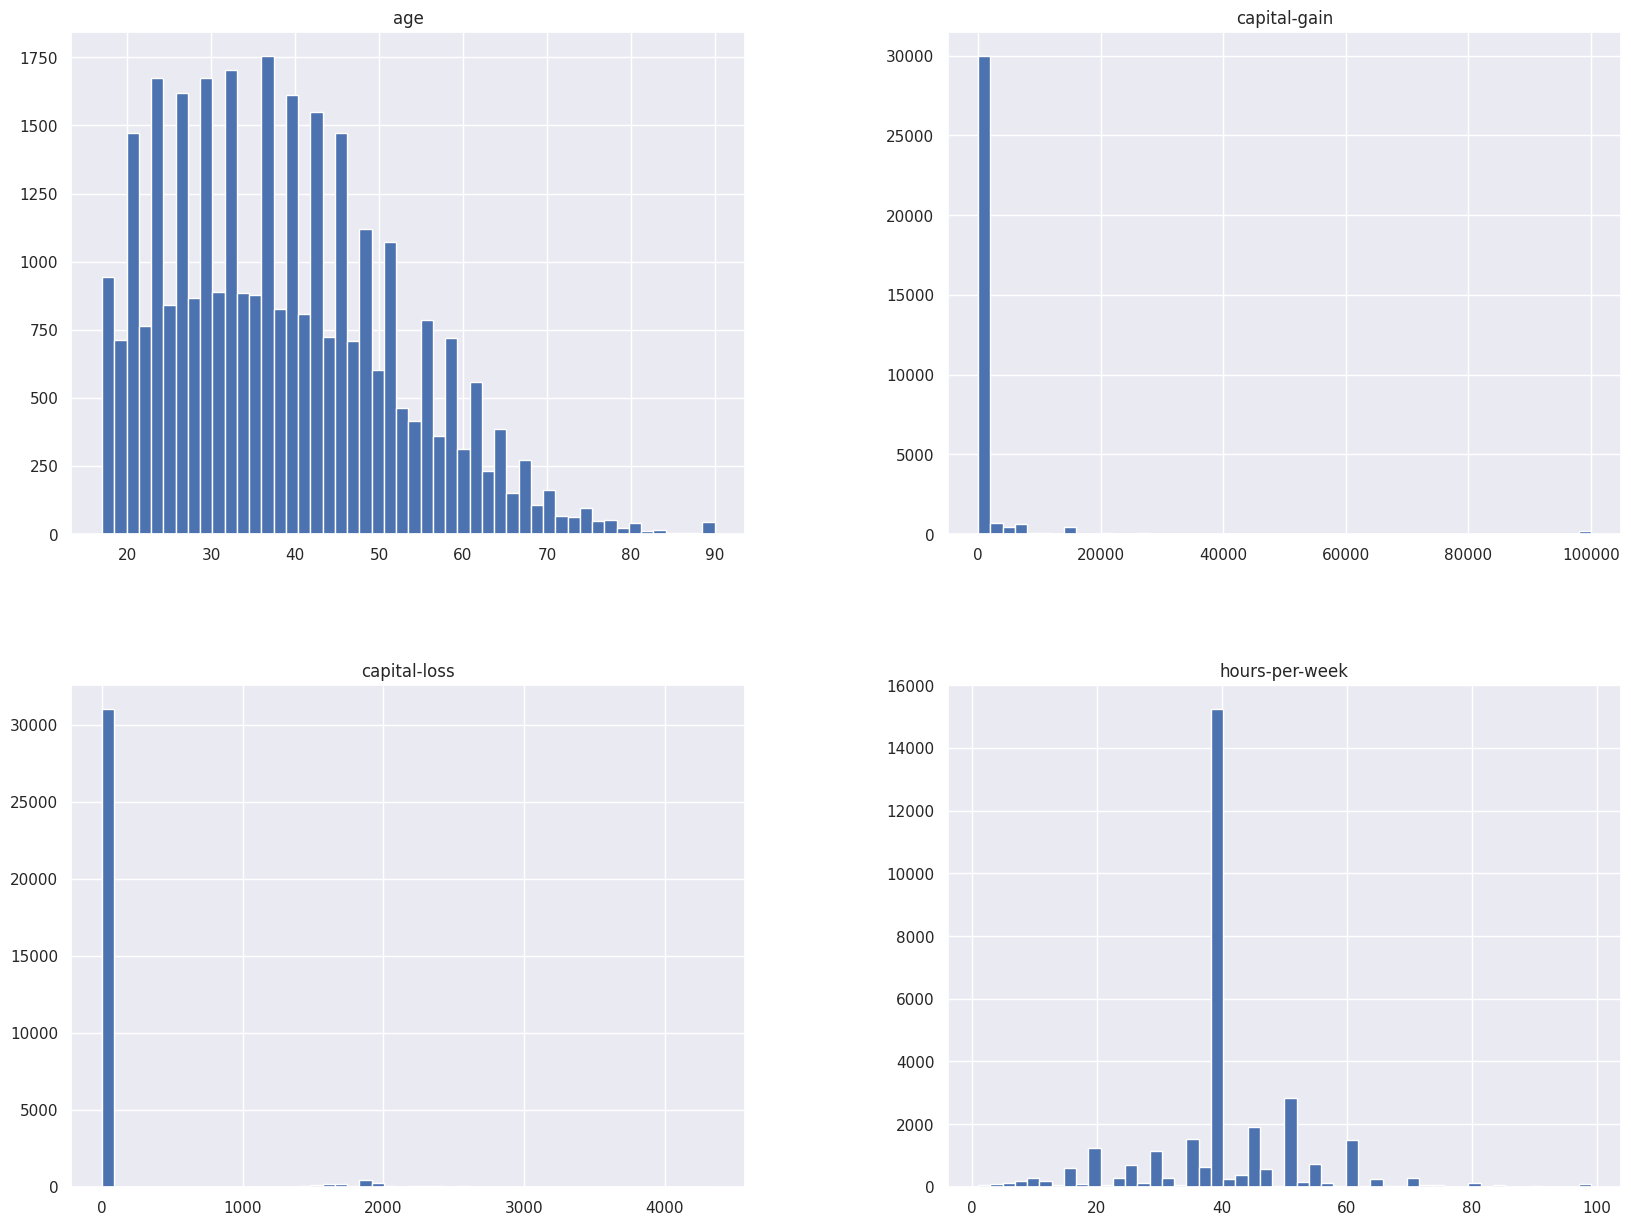

In [17]:
df_train[Variables].hist(bins = 50, figsize=(20,15))
plt.show()

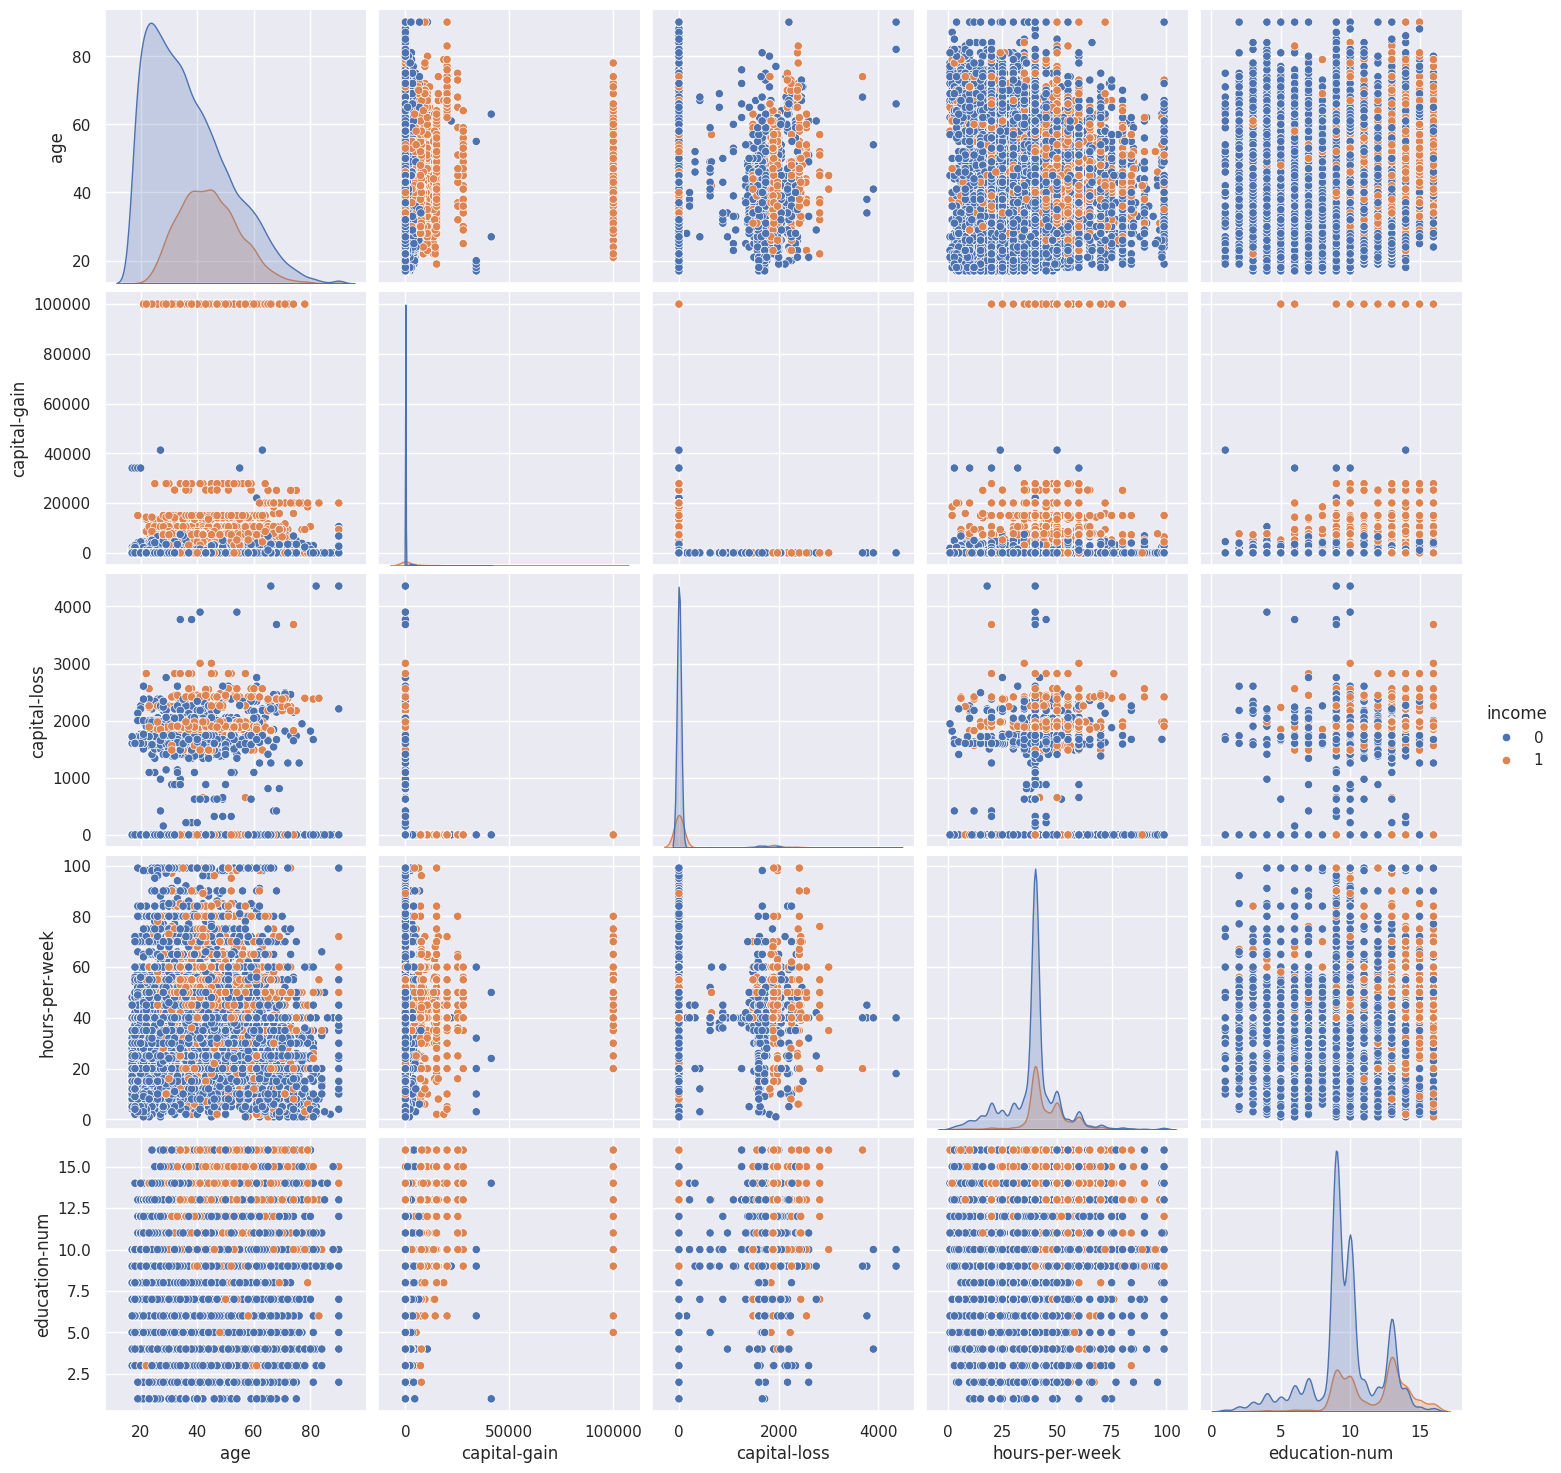

In [18]:
Variables = ['age', 'capital-gain', 'capital-loss', 'hours-per-week','education-num','income']
sns.pairplot(df_train[Variables], height=3, diag_kind = 'kde', hue='income')

Cruzamos las variables numéricas entre ellas y adiconalmente agregamos el Target para conocer la distribución y comenzar a generar hipótesis de variables que discriminan mejor a ambos grupos (Mayor y menor sueldo a 50K).

##### 3.3.2.- Correlaciones

<Axes: >

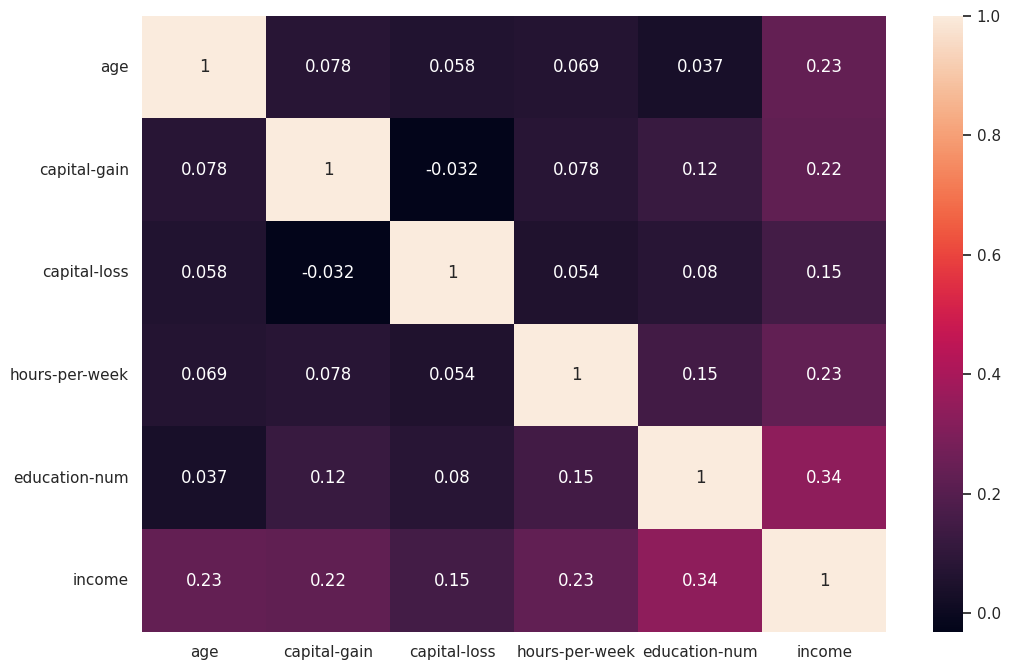

In [19]:
corr = df_train[['age', 'capital-gain', 'capital-loss', 'hours-per-week','education-num','income']].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

La correlación se encuentra ente -0.1 y 0.1, muy cercano a 0 por lo que podemos decir que no presentan relación lineal entre ellas.

##### 3.4.- Variables cualitativas

Obtendremos las variables cualitativas para conocer su distribución y su relación con la variable "Target".

In [20]:
categorical_attributes = df_train.select_dtypes(include=['object'])

In [21]:
categorical_attributes.dtypes

,0
work-class,object
education,object
marital-status,object
occupation,object
relationship,object
race,object
sex,object
native-country,object


##### 3.4.1.- Work Class (Tipo de Trabajo)

,0
work-class,
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1298
Without-pay,14


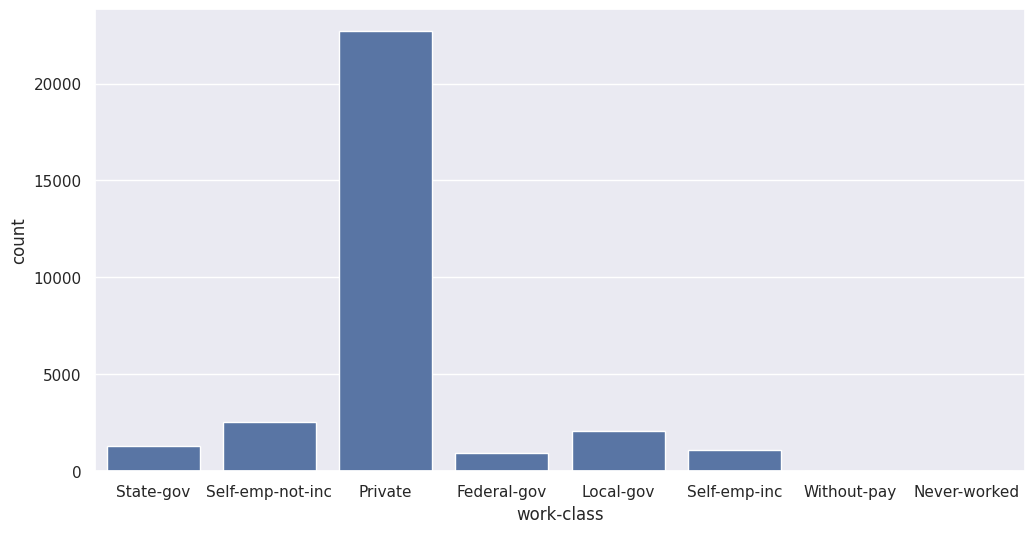

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "work-class")
df_train.groupby('work-class').size()

El tipo de trabajo "Private" tiene el 74% de casos del total de observaciones.

In [23]:
df_train[['work-class', 'income']].groupby(['work-class'], as_index=False).agg(['count','sum','mean'])

work-class income                
                     count   sum      mean
0       Federal-gov    960   371  0.386458
1         Local-gov   2093   617  0.294792
2      Never-worked      7     0  0.000000
3           Private  22696  4963  0.218673
4      Self-emp-inc   1116   622  0.557348
5  Self-emp-not-inc   2541   724  0.284927
6         State-gov   1298   353  0.271957
7       Without-pay     14     0  0.000000

Los segmentos de "Work-Class" con mayor proporción de salarios mayor a 50K (1) es en "Self-emp-inc" y "Federal-gov".

##### 3.4.2.- Education (Educación)

,0
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333
7th-8th,646
9th,514
Assoc-acdm,1067
Assoc-voc,1382


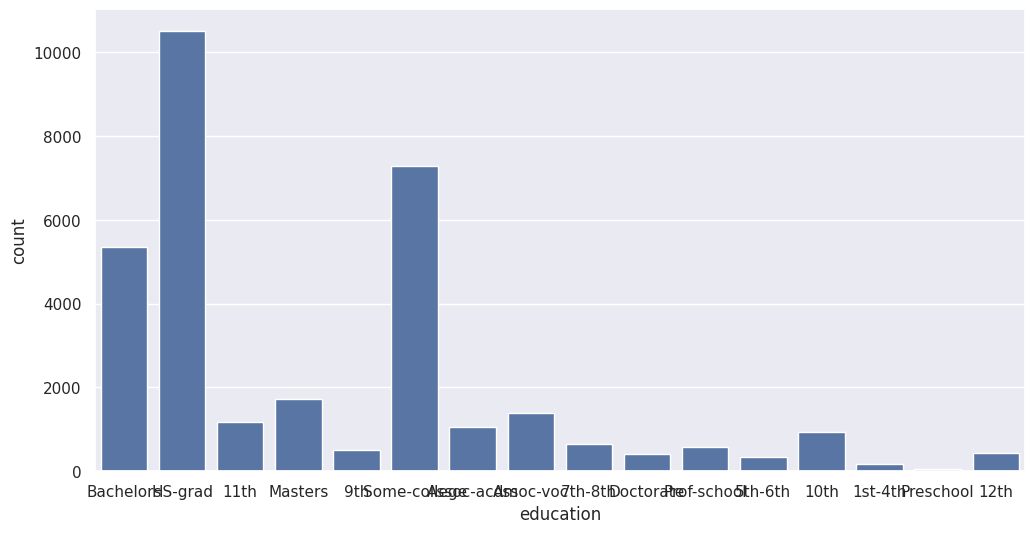

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "education")
df_train.groupby('education').size()

El nivel de educación "HS-grad" cuenta con el 32% de observaciones, seguido con "Some-Collegue" con 22% aprox.

In [25]:
df_train[['education', 'income']].groupby(['education'], as_index=False).agg(['count','sum','mean'])

education income                
                  count   sum      mean
0           10th    933    62  0.066452
1           11th   1175    60  0.051064
2           12th    433    33  0.076212
3        1st-4th    168     6  0.035714
4        5th-6th    333    16  0.048048
5        7th-8th    646    40  0.061920
6            9th    514    27  0.052529
7     Assoc-acdm   1067   265  0.248360
8      Assoc-voc   1382   361  0.261216
9      Bachelors   5355  2221  0.414753
10     Doctorate    413   306  0.740920
11       HS-grad  10501  1675  0.159509
12       Masters   1723   959  0.556587
13     Preschool     51     0  0.000000
14   Prof-school    576   423  0.734375
15  Some-college   7291  1387  0.190235

Los niveles de "Education" con mayor proporción de salarios mayor a 50K (1) son "Prof-school", "Masters" y "Bachelors".

##### 3.4.3.- Sex (Género)

,0
sex,
Female,10771
Male,21790


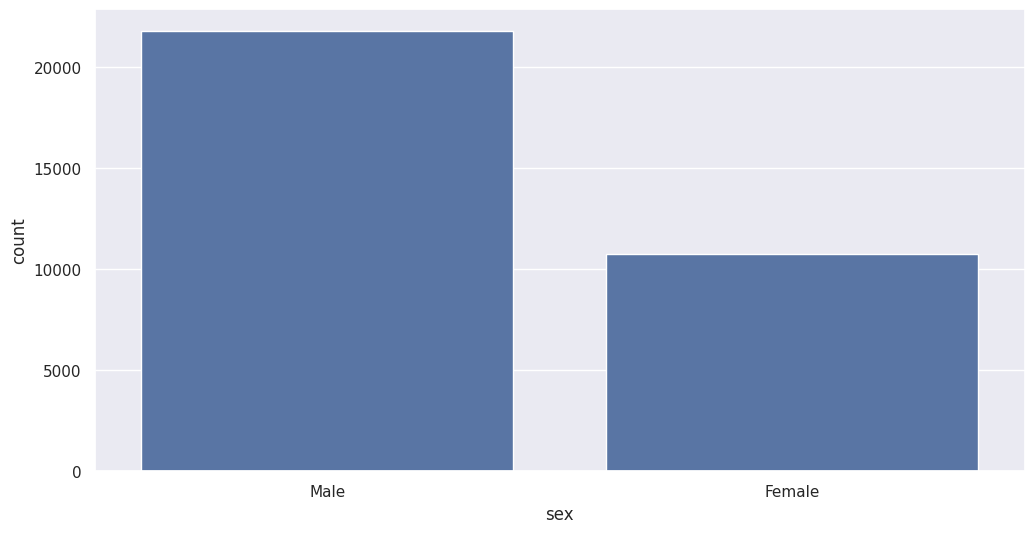

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(data = categorical_attributes, x = "sex")
df_train.groupby('sex').size()

El género Masculino cuenta con el 67% de personas, es decir 2 de cada 3 personas son masculinos.

sex income                
           count   sum      mean
0  Female  10771  1179  0.109461
1    Male  21790  6662  0.305737

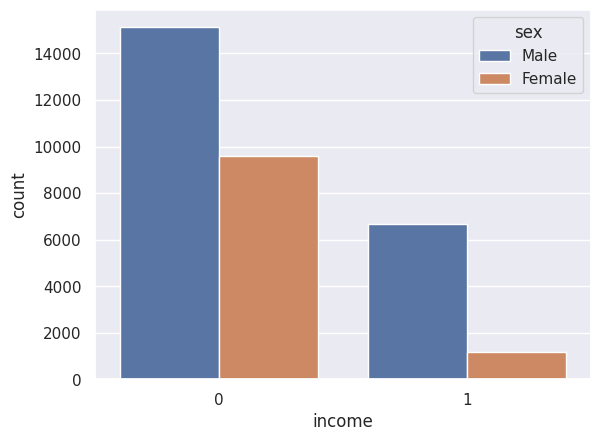

In [27]:
sns.countplot(x='income',data=df_train,hue='sex')
df_train[['sex', 'income']].groupby(['sex'], as_index=False).agg(['count','sum','mean'])

El género Masculino tiene mayor proporción de salarios mayor a 50K (1) respecto al género femenino (30% vs 11%).